# Monthly milk production: pounds per cow. Jan 62 – Dec 75

Data: https://datamarket.com/data/set/22ox/monthly-milk-production-pounds-per-cow-jan-62-dec-75#!ds=22ox&display=line

## Load Data

In [20]:
%matplotlib inline
import numpy as np

In [9]:
data = []
with open('./data/monthly-milk-production-pounds-p.csv') as fh:
    fh.next()
    for line in fh:
        production = line.strip().split(',')[-1]
        data.append(production) 
data = np.array(data[: -3], dtype=np.float)

Number of Data points

In [15]:
len(data)

168

### Normalize Data

In [95]:
data = (data - np.mean(data))/np.std(data)

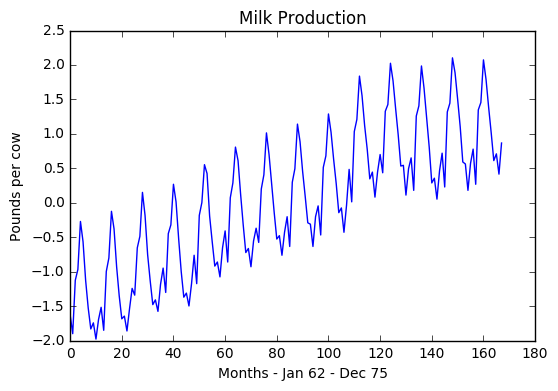

In [96]:
import matplotlib.pyplot as plt
plt.plot(range(len(data)), data)
plt.xlabel('Months - Jan 62 - Dec 75')
plt.ylabel('Pounds per cow')
plt.title('Milk Production')
plt.show()

## Train, Test sets

In [97]:
def create_sequences(series, window_size):
    X = [series[i: i+window_size] for i in range(len(series)-window_size)]
    y = [series[i+window_size] for i in range(len(series)-window_size)]
    X = np.array(X, dtype=np.float)
    y = np.array(y, dtype=np.float)
    return X, y

In [98]:
window_size = 6
sequences, prediction = create_sequences(data, window_size)
m, n = sequences.shape
sequences = np.reshape(sequences, (m, n, 1))

In [99]:
train_test_split = np.int(np.ceil(0.7*len(sequences)))
X_train, y_train = sequences[:train_test_split, :], prediction[:train_test_split]
X_test, y_test = sequences[train_test_split:, :], prediction[train_test_split:]

## Simple RNN Model

In [100]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense, Reshape

In [182]:
_input = Input(shape=(window_size, 1))
lstm = LSTM(32, activation='relu')(_input)
y_hat = Dense(1)(lstm)

In [183]:
from keras.optimizers import Adam
model = Model(inputs=[_input], outputs=[y_hat])

learning_rate = 0.001
optimizer = Adam(lr=learning_rate)

model.compile(optimizer=optimizer, loss='mean_squared_error')

In [184]:
history = model.fit(X_train, y_train, epochs=100,
                   validation_split=0.2, batch_size=50, verbose=2)

Train on 91 samples, validate on 23 samples
Epoch 1/100
2s - loss: 0.7325 - val_loss: 0.6699
Epoch 2/100
0s - loss: 0.7184 - val_loss: 0.6753
Epoch 3/100
0s - loss: 0.7051 - val_loss: 0.6781
Epoch 4/100
0s - loss: 0.6915 - val_loss: 0.6824
Epoch 5/100
0s - loss: 0.6775 - val_loss: 0.6865
Epoch 6/100
0s - loss: 0.6636 - val_loss: 0.6911
Epoch 7/100
0s - loss: 0.6488 - val_loss: 0.6960
Epoch 8/100
0s - loss: 0.6348 - val_loss: 0.7012
Epoch 9/100
0s - loss: 0.6186 - val_loss: 0.7060
Epoch 10/100
0s - loss: 0.6044 - val_loss: 0.7104
Epoch 11/100
0s - loss: 0.5883 - val_loss: 0.7147
Epoch 12/100
0s - loss: 0.5725 - val_loss: 0.7191
Epoch 13/100
0s - loss: 0.5576 - val_loss: 0.7233
Epoch 14/100
0s - loss: 0.5395 - val_loss: 0.7270
Epoch 15/100
0s - loss: 0.5228 - val_loss: 0.7309
Epoch 16/100
0s - loss: 0.5043 - val_loss: 0.7354
Epoch 17/100
0s - loss: 0.4900 - val_loss: 0.7401
Epoch 18/100
0s - loss: 0.4727 - val_loss: 0.7452
Epoch 19/100
0s - loss: 0.4567 - val_loss: 0.7504
Epoch 20/100
0s

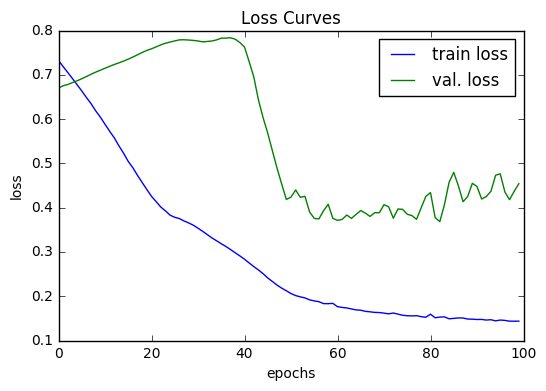

In [185]:
plt.plot(history.epoch, history.history['loss'], label='train loss')
plt.plot(history.epoch, history.history['val_loss'], label='val. loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss Curves')
plt.legend()
plt.show()

In [186]:
# print out training and testing errors
training_error = model.evaluate(X_train, y_train, verbose=0)
print('training error = ' + str(training_error))

testing_error = model.evaluate(X_test, y_test, verbose=0)
print('testing error = ' + str(testing_error))

training error = 0.204910677776
testing error = 1.0950867335


In [187]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

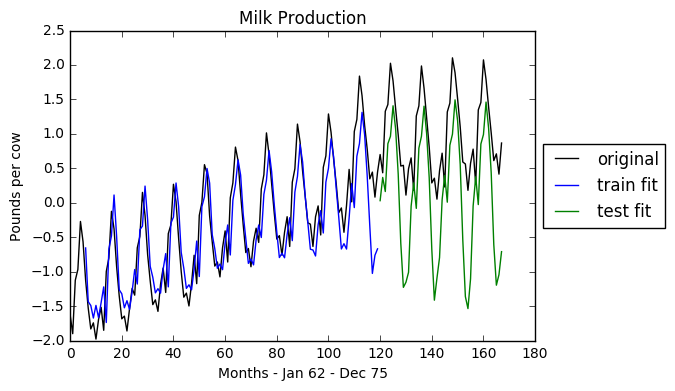

In [188]:
plt.plot(range(len(data)), data, 'k', label='original')
plt.plot(range(window_size, window_size+len(X_train)), 
         train_predict, label='train fit')
plt.plot(range(train_test_split+window_size, train_test_split+window_size+len(X_test)),
         test_predict, label='test fit')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Months - Jan 62 - Dec 75')
plt.ylabel('Pounds per cow')
plt.title('Milk Production')
plt.show()